<a href="https://colab.research.google.com/github/patelruday/Machine_learning/blob/main/KNN_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,StratifiedKFold,GridSearchCV
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np


In [ ]:
wine=pd.read_csv('winequality-red.csv')

In [ ]:
wine.shape

(1599, 12)

In [ ]:
wine.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
wine.quality.value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [ ]:
wine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<Axes: xlabel='quality', ylabel='count'>

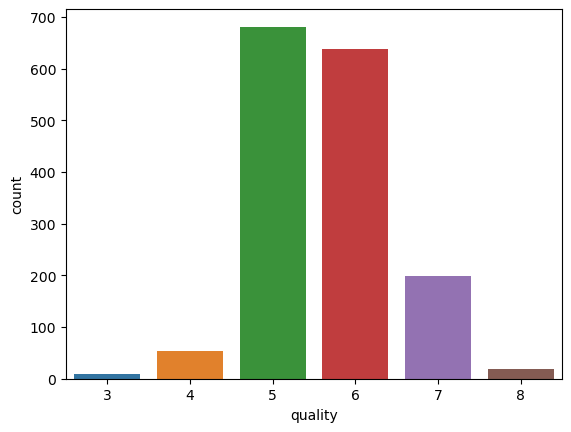

In [ ]:
sns.countplot(x=wine['quality'])

In [ ]:
wine1=wine.copy()

In [ ]:
wine1['quality']=[1 if x>=6 else 0 for x in wine1['quality']]

<Axes: xlabel='quality', ylabel='count'>

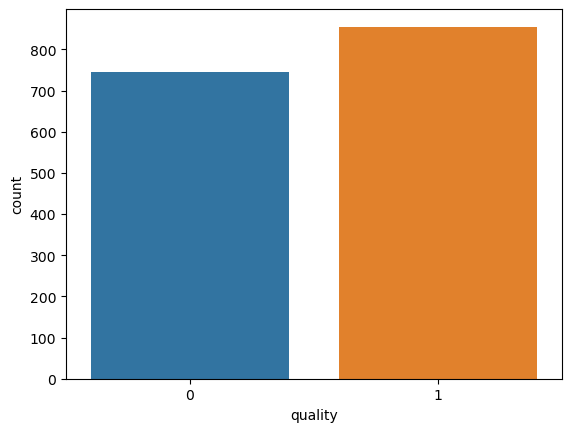

In [ ]:
sns.countplot(x=wine1['quality'])


In [ ]:
X=wine1.drop(['quality'],axis=1)
y=wine1['quality']

In [ ]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [ ]:
y.head()

0    0
1    0
2    0
3    1
4    0
Name: quality, dtype: int64

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=2024,stratify=y)

In [ ]:
X_train.shape

(1279, 11)

In [ ]:
X_test.shape

(320, 11)

In [ ]:
scaler=StandardScaler()

In [ ]:
X_train_sc=scaler.fit_transform(X_train)

In [ ]:
X_test_sc=scaler.transform(X_test)

In [ ]:
error_rate=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_sc,y_train)
    y_prd=knn.predict(X_test_sc)
    error_rate.append(np.mean(y_prd!=y_test))

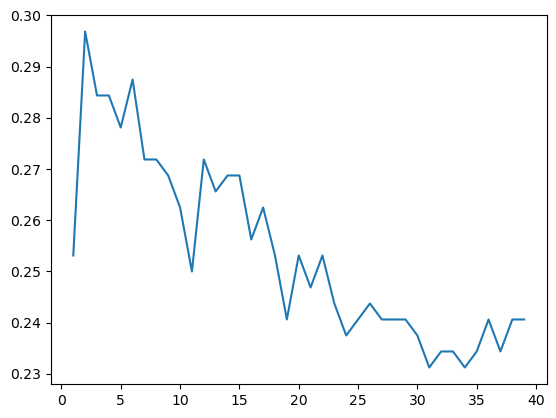

In [ ]:
plt.plot(range(1,40),error_rate)

In [ ]:
knn=KNeighborsClassifier(n_neighbors=25)

In [ ]:
knn.fit(X_train_sc,y_train)

KNeighborsClassifier(n_neighbors=25)

In [ ]:
#training accuracy
y_prd_train=knn.predict(X_train_sc)
accuracy_score(y_train,y_prd_train)

0.7537138389366693

In [ ]:
y_pred=knn.predict(X_test_sc)

In [ ]:
print(confusion_matrix(y_test,y_pred))

[[116  33]
 [ 44 127]]


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.78      0.75       149
           1       0.79      0.74      0.77       171

    accuracy                           0.76       320
   macro avg       0.76      0.76      0.76       320
weighted avg       0.76      0.76      0.76       320



In [ ]:
accuracy_score(y_test,y_pred)

0.759375

In [ ]:
#cross validation

In [ ]:
cv=StratifiedKFold(n_splits=5,shuffle=True,random_state=2024)

In [ ]:
param_grid={
    'n_neighbors':[i for i in range(1,40)],
    'weights':['uniform','distance'],
    'metric':['euclidean','manhattan']
}

In [ ]:
grid_search=GridSearchCV(estimator=knn,cv=cv,param_grid=param_grid,scoring='accuracy')

In [ ]:
grid_search.fit(X_train_sc,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2024, shuffle=True),
             estimator=KNeighborsClassifier(n_neighbors=25),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
#print the best parameters found by grid search

In [ ]:
print("best hyperparameters: ",grid_search.best_params_)


best hyperparameters:  {'metric': 'euclidean', 'n_neighbors': 14, 'weights': 'distance'}


In [ ]:
best_knn=grid_search.best_estimator_

In [ ]:
y_pred_1=best_knn.predict(X_test_sc)

In [ ]:
print(classification_report(y_test,y_pred_1))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79       149
           1       0.81      0.81      0.81       171

    accuracy                           0.80       320
   macro avg       0.80      0.80      0.80       320
weighted avg       0.80      0.80      0.80       320



In [ ]:
print(confusion_matrix(y_test,y_pred_1))

[[117  32]
 [ 32 139]]
